- 모델은 Blackbox
  - 왜 그런 결과가 나왔는지를 설명할 수 없다. -> Decision Tree로 설명 가능.

- 분류 ?
- 회귀 ?
- 둘 다 된다고 가정했을 때, 설명이 쉬운가?

#### 과대적합 vs 과소 적합
- 과대적합(Overfitting)은 모델이 훈련 데이터에 너무 잘 맞지만 **일반성이 떨어진다**
- 해결책
  - 데이터를 늘인다
  - Validation Set 이용
  - 규제, 정규화
- 과소적합(Underfitting)은 모델이 훈련 데이터에도, 일반화에서도 잘 되지 않는 경우
- 해결책
  - 데이터를 늘인다
  - 규제를 줄인다
  - hyperpararmeter 조정

#### 하이퍼파라미터
- Parameter 
  - 데이터를 통해 측정이 가능한 값이며, 모델이 새로운 샘플을 예측할 때 요구하는 값
  ex) logistic regression의 가중치(w) 또는 절편(b)
- Hyperparameter - *일반화된 모델을 찾기 위해서 적절한 hyperparameter를 찾아내야 한다.*
  - 모델이 아닌 학습 알고리즘 자체의 파라미터로 성능을 최적화하거나 bias(편향)과 variance(분산) 사이의 균형을 맞출 때 알고리즘을 조절하기 위해 사용
  - 학습 전체 미리 지정하여 훈련하는 동안에는 상수로 남게 되며, **파라미터와 다르게 주로 알고리즘 사용자에 의해 정해짐.**
  - 예를 들어, SVM의 코스트 값인 C, logistic regression의 훈련 세트의 반복 횟수 혹은 epoch(에포크)
  - Manual, Grid, Random, Bayesian 기법 등을 사용

# 결정 트리(Decision Tree)

- 결정 트리는 **분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘**
- **복잡한 데이터셋도 학습할 수 있다.**
- 결정 트리는 최근에 자주 사용되는 가장 강력한 머신러닝 알고리즘 중 하나이며, 랜덤 포레스트의 기본 구성요소

- 조건, gini, samples, 값, 분류


- 예측하기
  - 루트 노드(root node)에서 시작해서 계속해서 리프 노드(leaf node)로 추가적인 검사를 진행
  - Sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 알려줌(현업에서는 sample이 중요) ex) 20대에게는 준중형, 아반떼..
  - value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지를 알려줌
  - 개별 노드의 gini 속성은 불순도(Impurity)를 측정, 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini = 0)하다고 함

- 클래스 확률 추정
  - 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정
  - 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환

model.predict_proba([[5, 1.5, 1, 2]])

model.predict([[5, 1.5, 1, 2]])

- CART 훈련 알고리즘
  - scikit-learn은 결정 트리를 훈련시키기 위해 CART(Classification And Regression Tree) 알고리즘을 사용
  - CART 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 이런 식으로 계속 반복
  - **최대 깊이**가 되면 중지하거나 **불순도를 줄이는 분할을 찾을 수 없을 때** 멈추게 됨

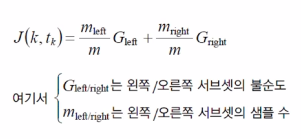

- 계산 복잡도
  - 결정 트리는 특성 수와 무관하게 O(log2(m))으로, 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르며, 훈련 세트가 작을 경우 미리 데이터를 정렬하여 훈련 속도를 높일 수 있음
  - 하지만 훈련 세트가 클 경우에는 속도가 많이 느려짐

#### 결론
1. 결정 트리를 읽는 것이 중요
2. 깊이를 조정하거나 불순도가 0이 나오게 해야 함


- 규제 매개변수
  - 결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없지만, 제한을 두지 않으면 대부분 과대적합되기 쉬움 -> **depth만** 제어할 수 있다. 제한을 두지 않으면 무조건 과대적합


- 이해하기 쉽고, 해석하기 쉽고, 사용 편리, 여러 용도로 사용 가능, 성능이 뛰어남
- 단점 
  1. 훈련 세트의 회전에 민감
  2. 작은 변환에도 매우 민감
- 해결책
  - pruning
  - 데이터 정제

# 랜덤 포레스트

- 일반적으로 배깅 방법(또는 페이스팅)을 적용한 결정 트리의 앙상블
  - 배깅 (Bagging) : (B)ootstrap (agg)regat(ing) 의 줄임말, **샘플링시 중복 허용** 트리를 여러 개 만들어 모은다. 데이터 민감도 해결
  - 페이스팅 (Pasting) : 샘플링시 중복 허용하지 않음

- **다중 코어를 활용하여 학습 속도가 빠르다**
- 랜덤 포레스트 알고리즘은 트리의 노드를 분할할 때 전체 특성 중에서 최선의 특성을 찾는 대신 무작위로 선택한 특성 후보 중에서 최적의 특성을 찾는 식으로 무작위성을 더 주입 -> 전체적으로 더 훌륭한 모델을 만듬(과대적합이 잘 안되는 모델이 됨.)

- 엑스트라 트리(Extra-trees)
  - 랜덤 포레스트에서 트리를 만들 때, 각 노드에서 무작위로 특성의 서브셋을 만들어 분할에 사용되며, 트리를 **더욱 무작위**하게 만들기 위해 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그 중에서 최상의 분할을 선택
  - 이와 같이 극단적으로 무작위한 트리의 랜덤 포레스트를 '익스트림 랜덤 트리' 앙상블이라고 부름 -> 편향이 늘어나지만 분산을 낮추게 됨.
  - 모든 노드에서 특성마다 가장 최적의 임계값을 찾는 것이 트리 알고리즘에서 가장 시간이 많이 소요되는 작업 중 하나이므로 일반적인 랜덤 포레스트보다 엑스트라 트리가 훨씬 빠름

- 특성 중요도
  - 랜덤 포레스트의 **장점**은 상대적 중요도를 측정하기 쉽다는 것
  - 특성을 선택해야 할 때 어떤 특성이 중요한지 빠르게 확인할 수 있으며, 이러한 특성을 해석할 때 많은 이점을 안겨줌
  - 랜덤 -> 데이터가 편향을 가질 수 있다.
    - 심지어 랜덤 포레스트, decision tree는 데이터에 민감하므로 데이터의 편향에 더 취약하다
    - 해결책 : 데이터 분석 -> 랜덤 포레스트 -> 결과 해석 -> 보고서